<a href="https://colab.research.google.com/github/hritik880/Datathon/blob/main/human_datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd # Data analysis and manipultion tool

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/hippocorpus/train_set_label.csv" )

In [ ]:
df.isna().sum()

Solidity           0
Eccentricity       0
EquivDiameter      0
Extrema            0
FilledArea         0
Extent             0
Orientation        0
EulerNumber        0
BoundingBox1       0
BoundingBox2       0
BoundingBox3       0
BoundingBox4       0
ConvexHull1        0
ConvexHull2        0
ConvexHull3        0
ConvexHull4        0
MajorAxisLength    0
MinorAxisLength    0
Perimeter          0
ConvexArea         0
Centroid1          0
Centroid2          0
Area               0
microorganism      0
dtype: int64

In [ ]:
df.describe()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,BoundingBox3,BoundingBox4,ConvexHull1,ConvexHull2,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,microorganism
count,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000
mean,0.483543,0.816668,0.158836,0.528733,0.027930,0.390554,0.480102,0.967930,0.483085,0.444948,0.085813,0.123932,0.494234,0.494234,0.487924,0.487700,0.082797,0.043939,0.049383,0.012236,0.515745,0.479954,0.048216,2.500000
std,0.209131,0.168313,0.111070,0.238477,0.048621,0.218697,0.310809,0.045840,0.239790,0.227774,0.088206,0.111279,0.236573,0.236573,0.238699,0.239473,0.086908,0.052404,0.068806,0.041491,0.239394,0.224588,0.065958,1.118074
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000073,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.298202,0.719613,0.091416,0.352069,0.008160,0.213847,0.165487,0.962403,0.307823,0.266257,0.028391,0.052066,0.320683,0.320683,0.317745,0.311429,0.025956,0.020286,0.011265,0.001776,0.336157,0.314578,0.015655,1.750000
50%,0.466642,0.869592,0.135782,0.524431,0.015266,0.354430,0.522795,0.980866,0.459683,0.449033,0.063432,0.090909,0.478052,0.478052,0.463492,0.462857,0.057924,0.028227,0.026138,0.003972,0.508826,0.462994,0.028598,2.500000
75%,0.669901,0.938896,0.209592,0.715447,0.031614,0.523621,0.752532,0.990260,0.661587,0.590510,0.114676,0.162458,0.676154,0.676154,0.668571,0.673651,0.112127,0.056314,0.057580,0.010660,0.710310,0.658128,0.058514,3.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [ ]:
df['microorganism'].value_counts()

4    3456
3    3456
2    3456
1    3456
Name: microorganism, dtype: int64

In [ ]:
x = df.drop(['microorganism'],axis=1)
y = df['microorganism']

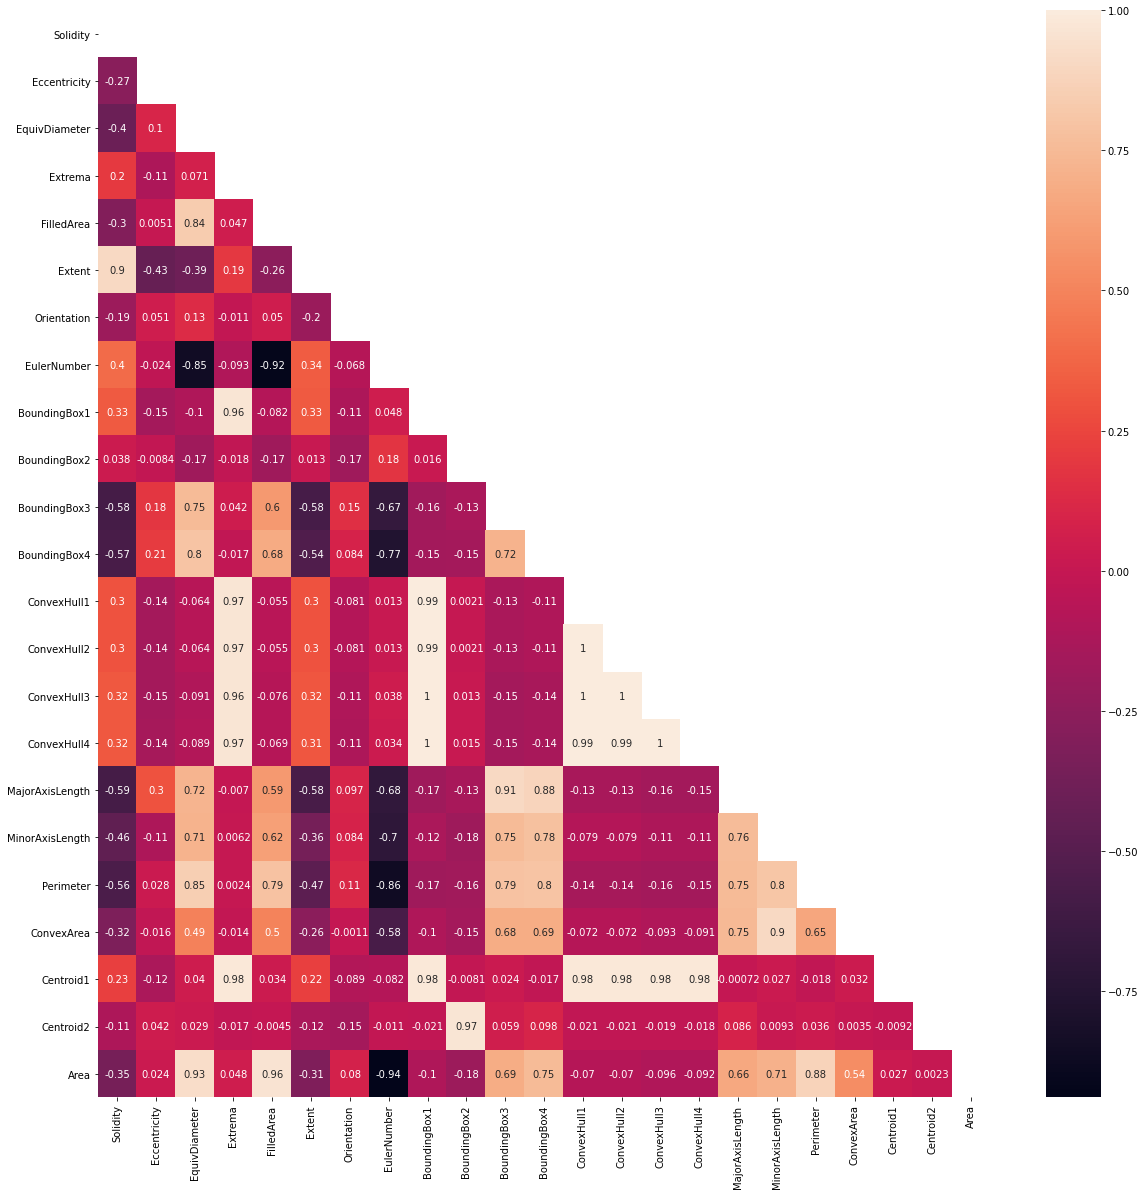

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = x.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True)

In [ ]:
# from sklearn.datasets import make_classification
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
# # generate dataset
# # X, y = make_classification(n_samples=100, n_features=30, n_informative=2)
# # define feature selection
# fs = SelectKBest(score_func=f_classif, k=21)
# # apply feature selection
# X_selected = fs.fit_transform(x, y)
# print(X_selected.shape)

array([1, 2, 2, ..., 3, 4, 1])

In [ ]:
# columns = np.full((corr.shape[0],), True, dtype=bool)
# for i in range(corr.shape[0]):
#     for j in range(i+1, corr.shape[0]):
#         if corr.iloc[i,j] >= 0.99:
#             if columns[j]:
#                 columns[j] = False
# selected_columns = corr.columns[columns]
# data = df[selected_columns]

In [ ]:
# X_selected

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size = 0.25)

In [ ]:
x_train

array([[2.56896861e-01, 9.74831763e-01, 1.24439510e-01, ...,
        2.63690897e-01, 4.02555658e-01, 2.47899290e-02],
       [6.23753498e-01, 4.35788572e-01, 7.35724800e-03, ...,
        4.14840026e-01, 3.87387097e-01, 6.77811000e-04],
       [1.65342822e-01, 9.53101676e-01, 1.90408983e-01, ...,
        6.33628391e-01, 4.55896729e-01, 4.94203720e-02],
       ...,
       [3.05047081e-01, 9.91361801e-01, 2.12984239e-01, ...,
        9.20627187e-01, 2.80591903e-01, 5.96772430e-02],
       [4.65382474e-01, 6.55977546e-01, 3.69259540e-02, ...,
        5.37230369e-01, 1.85147699e-01, 6.79074700e-03],
       [2.47472685e-01, 9.38896366e-01, 2.90513723e-01, ...,
        5.07411748e-01, 4.28439307e-01, 1.02000538e-01]])

In [ ]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [900,950,1000],  
              'gamma': [1,0.98,0.95]
              }  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(x_train, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=900, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=900, gamma=1, score=0.989, total=   2.8s
[CV] C=900, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV] ...................... C=900, gamma=1, score=0.992, total=   2.9s
[CV] C=900, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.7s remaining:    0.0s


[CV] ...................... C=900, gamma=1, score=0.993, total=   2.7s
[CV] C=900, gamma=1 ..................................................
[CV] ...................... C=900, gamma=1, score=0.987, total=   2.9s
[CV] C=900, gamma=1 ..................................................
[CV] ...................... C=900, gamma=1, score=0.994, total=   3.0s
[CV] C=900, gamma=0.98 ...............................................
[CV] ................... C=900, gamma=0.98, score=0.989, total=   2.8s
[CV] C=900, gamma=0.98 ...............................................
[CV] ................... C=900, gamma=0.98, score=0.992, total=   2.9s
[CV] C=900, gamma=0.98 ...............................................
[CV] ................... C=900, gamma=0.98, score=0.993, total=   2.9s
[CV] C=900, gamma=0.98 ...............................................
[CV] ................... C=900, gamma=0.98, score=0.987, total=   2.9s
[CV] C=900, gamma=0.98 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [900, 950, 1000], 'gamma': [1, 0.98, 0.95]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
grid.best_estimator_

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svc =SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svc.fit(x_train,y_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

0.9890046296296297


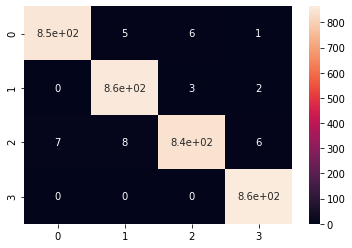

In [ ]:
prediction = svc.predict(x_test)
cm = confusion_matrix(y_test, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]                
print(accuracy)
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.metrics import f1_score
print('F1 Score is: ', f1_score(y_test, prediction, average = 'weighted'))

F1 Score is:  0.9889850484423177


In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/sukhna_dhanas/test_set_label.csv')
# test_data = test_data[selected_columns]
# test_data = fs.transform(test_data)
target = svc.predict(test_data)
res = pd.DataFrame(target) #target is nothing but the final predictions of your model on input features of your new unseen test data
# res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("submission.csv") # the csv file will be saved locally on the same location where this notebook is located.
from google.colab import files
res.to_csv('submission.csv',index=False)
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pip install xgboost

In [ ]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "n_estimators" : [100,500,1000]     
}

In [ ]:
import time
from xgboost import XGBClassifier
# create a default XGBoost classifier
xgb = XGBClassifier(tree_method = 'gpu_hist')

In [ ]:
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score , average='weighted')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(xgb,param_distributions=params,n_iter=10,scoring=f1,n_jobs=-1,cv=10,verbose=3)

In [ ]:
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))
        

In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(data.values,y.values)
timer(start_time)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 22.7min finished



 Time taken: 0 hours 23 minutes and 1.71 seconds.


In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=5, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

In [ ]:
# xgb_best = random_search.best_estimator_
xgb_best = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=5, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgb_best,X_selected,y.values,scoring = f1,cv=10)
print(score.mean())

0.9938457190898818


2.8174723254402787
2.8174723254402787


In [ ]:
xgb_best.fit(x_train,y_train)

NameError: ignored

0.9927662037037037


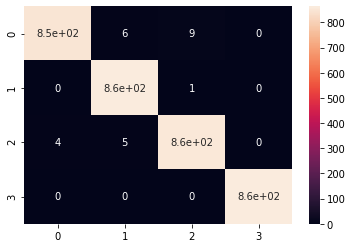

In [ ]:
prediction = xgb_best.predict(x_test)
cm = confusion_matrix(y_test, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]                
print(accuracy)
sns.heatmap(cm,annot=True)

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/sukhna_dhanas/test_set_label.csv')
# test_data = test_data[selected_columns]
test_data = fs.transform(test_data)
target = xgb_best.predict(test_data)
res = pd.DataFrame(target) #target is nothing but the final predictions of your model on input features of your new unseen test data
# res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("submission.csv") # the csv file will be saved locally on the same location where this notebook is located.
from google.colab import files
res.to_csv('submission.csv',index=False)
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


forest = RandomForestClassifier(random_state = 1, n_estimators = 10, min_samples_split = 1)

n_estimators = [100]
max_depth = [ 8, 15]
min_samples_split = [5, 10, 15]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(x_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   59.1s finished


In [ ]:
bestF.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
rf.feature_importances_

array([0.10842038, 0.0526925 , 0.07871719, 0.02221609, 0.06409705,
       0.06982028, 0.02598957, 0.027985  , 0.01775955, 0.02307109,
       0.04335   , 0.03708699, 0.01820146, 0.01944049, 0.01498577,
       0.01596568, 0.06314005, 0.04810522, 0.07043215, 0.07239471,
       0.01768771, 0.02365232, 0.06478876])

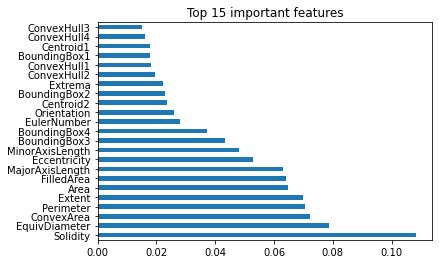

In [ ]:
feat_importances = pd.Series(rf.feature_importances_, index=x.columns)
feat_importances.nlargest(27).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()

0.9959490740740741


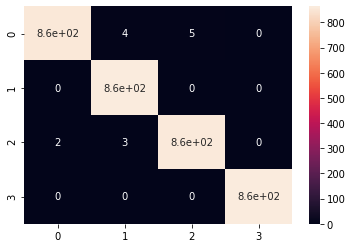

In [ ]:
prediction = rf.predict(x_test)
cm = confusion_matrix(y_test, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]                
print(accuracy)
sns.heatmap(cm,annot=True)

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/sukhna_dhanas/test_set_label.csv')
# test_data = test_data[selected_columns]
target = rf.predict(test_data.values)
res = pd.DataFrame(target) #target is nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("submission.csv") # the csv file will be saved locally on the same location where this notebook is located.
from google.colab import files
res.to_csv('submission.csv',index=False)
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
                            
gsc = GridSearchCV(
    estimator=model,
    param_grid={
        'n_estimators': [400,500, 700,1000],
        'max_depth': [8,10,15],
        'min_samples_split':[2,5,10,20],
        'bootstrap':[True,False]

    },
    # scoring=f1,
    cv=3,
    verbose = 3
)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size = 0.25)

In [ ]:
grid_result = gsc.fit(x_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] bootstrap=True, max_depth=8, min_samples_split=2, n_estimators=400 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=8, min_samples_split=2, n_estimators=400, score=0.883, total=   1.3s
[CV] bootstrap=True, max_depth=8, min_samples_split=2, n_estimators=400 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  bootstrap=True, max_depth=8, min_samples_split=2, n_estimators=400, score=0.895, total=   1.2s
[CV] bootstrap=True, max_depth=8, min_samples_split=2, n_estimators=400 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


[CV]  bootstrap=True, max_depth=8, min_samples_split=2, n_estimators=400, score=0.881, total=   1.2s
[CV] bootstrap=True, max_depth=8, min_samples_split=2, n_estimators=500 
[CV]  bootstrap=True, max_depth=8, min_samples_split=2, n_estimators=500, score=0.880, total=   1.5s
[CV] bootstrap=True, max_depth=8, min_samples_split=2, n_estimators=500 
[CV]  bootstrap=True, max_depth=8, min_samples_split=2, n_estimators=500, score=0.894, total=   1.5s
[CV] bootstrap=True, max_depth=8, min_samples_split=2, n_estimators=500 
[CV]  bootstrap=True, max_depth=8, min_samples_split=2, n_estimators=500, score=0.881, total=   1.5s
[CV] bootstrap=True, max_depth=8, min_samples_split=2, n_estimators=700 
[CV]  bootstrap=True, max_depth=8, min_samples_split=2, n_estimators=700, score=0.883, total=   2.1s
[CV] bootstrap=True, max_depth=8, min_samples_split=2, n_estimators=700 
[CV]  bootstrap=True, max_depth=8, min_samples_split=2, n_estimators=700, score=0.896, total=   2.1s
[CV] bootstrap=True, max_dept

[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed: 11.1min finished


In [ ]:
gsc.best_estimator_

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=15, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=400,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
et = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=15, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=400,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
et.fit(x.values,y.values)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=15, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=400,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

1.0


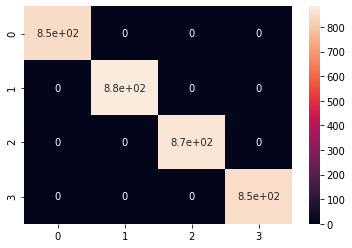

In [ ]:
prediction = et.predict(x_test)
cm = confusion_matrix(y_test, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]                
print(accuracy)
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.metrics import f1_score
print('F1 Score is: ', f1_score(y_test, prediction, average = 'weighted'))

F1 Score is:  1.0


In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/sukhna_dhanas/test_set_label.csv')
# test_data = test_data[selected_columns]
target = et.predict(test_data.values)
res = pd.DataFrame(target) #target is nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("submission.csv") # the csv file will be saved locally on the same location where this notebook is located.
from google.colab import files
res.to_csv('submission.csv',index=False)
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
int(X) 

1

In [ ]:
import math
import numpy as np


# Method to make predictions
def predict(X, b, a):
    return np.array([1 / (1 + math.exp(-1*b + -1*a*X)) ])

# Method to train the model
def logistic_regression(X, Y,a,b):


    # Initializing variables
    b = b
    a = a
    L = 1
    epochs = 100

    for epoch in range(epochs):
        y_pred = predict(X, b, a)
        D_b = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b
        D_a = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt a
        # Update b and a
        b = b -(L * D_b)
        a = a - (L * D_a)
    
    return b, a

In [ ]:
np.array(b0)

array(2.87135877)

In [ ]:
a

1.0